# Load all structs and functions

In [1]:
include("src/LiftAlgorithm.jl")
include("src/EchoVisualization.jl")
include("src/LiftVisualization.jl")

_lift_edges_visualization! (generic function with 1 method)

# Create a connected graph Topology

In [2]:
number_of_nodes = 30
g = create_scale_free_topology(number_of_nodes)
# g = create_small_world_topology(number_of_nodes)

{30, 56} undirected simple Int64 graph

# Run EchoAlgorithm and create directed Tree

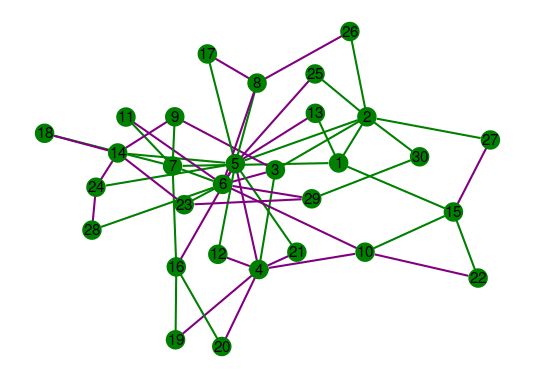

In [3]:
cb(content::Letter{Int64,LiftContent}) = LiftContent()
initiator = 1
echo_alg = EchoAlgorithm{Int64}(g, initiator)
init_echo_algorithm!(echo_alg, LiftContent())
fgp = FixedGraphPlot{Int64}(g)
while !has_terminated(echo_alg)
    echo_algorithm_step!(echo_alg, cb)
end
echo_visualization!(fgp, echo_alg)
gc = graph_context(fgp)

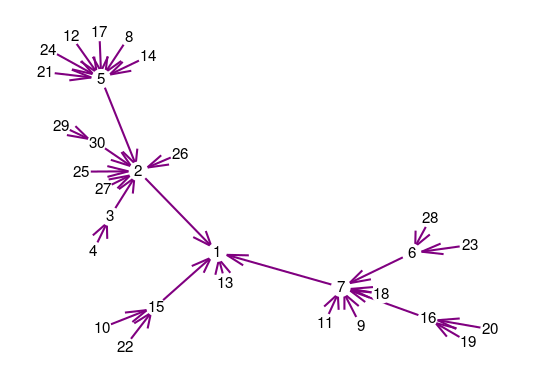

In [4]:
using Graphs:tree
t = tree(echo_alg.activation_edges)
t = SimpleDiGraphFromIterator(reverse(e) for e in edges(t))
ftp = FixedGraphPlot{Int64}(t)
gc = graph_context(ftp)

# Run LiftAlgorithm and create Animation

Token Node red

Token Edge crimson

Inquirer navajowhite

Nodes with non-empty request-sets snow4

Edgelables T for Token and R for request message

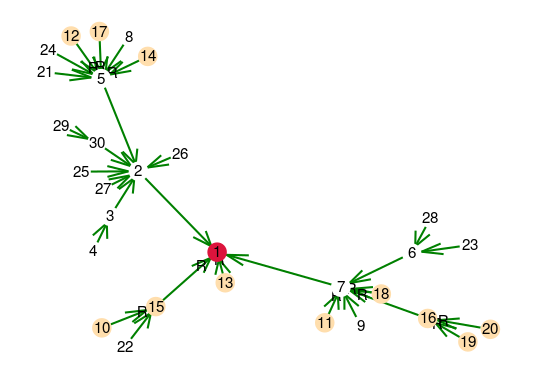

In [5]:
anim = Animation()
frame(anim, gc)
inquirer =  Set{Int64}(10:20)
lift_alg = LiftAlgorithm{Int64}(t, inquirer)
init_lift_algorithm!(lift_alg)
lift_visualization!(ftp, lift_alg)
gc = graph_context(ftp)

In [6]:
frame(anim, gc)
i = 0
while !has_terminated(lift_alg)
    i += 1
    lift_algorithm_step!(lift_alg)
    reset_edgeindices!(ftp) # edges can get flipped
    lift_visualization!(ftp, lift_alg)
    gc = graph_context(ftp)
    frame(anim, gc)
end
"$i steps"

"56 steps"

# Save and display gif Animation

┌ Info: Saved animation to 
│   fn = /home/tom/Uni/dist-algorithms/pics/lift_sim.gif
└ @ Plots /home/tom/.julia/packages/Plots/9C6z9/src/animation.jl:114


Plots.AnimatedGif("/home/tom/Uni/dist-algorithms/pics/lift_sim.gif")
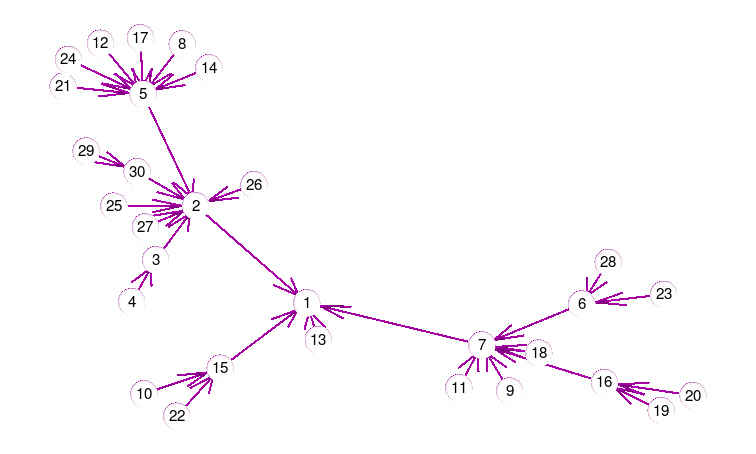

In [7]:
gif(anim, "pics/lift_sim.gif", fps = 1)

## Legend

red : Token Node

crimson : Token Edge 

navajowhite : Inquirer 

snow4 : Nodes with non-empty request-sets 

Edgelabels: T for Token and R for request message